**Project: Predicting Risk of Heart Disease Using Machine Learning** <br>
**Author: Rudra Nair**<br>
SID: 2360615<br>
Module: MOD006567 – Application of Machine Learning<br><br>
**Description:**<br>
This project focuses on predicting whether a patient has heart disease based on features like age, sex, cholesterol, blood pressure, etc. The model is a binary classifier with the target variable being target (where 0 means no heart disease and 1 means heart disease present).

**Key Points:**<br>
Dataset Used: heart_disease_uci.csv (UCI Heart Disease Dataset).<br>
Contains health-related features like age, sex, cp (chest pain type), trestbps (resting blood pressure), chol (cholesterol), thalch (max heart rate), etc.

**Models Trained & Evaluated:**

1. Logistic Regression

2. SVM

3. Decision Tree

4. Random Forest

5. Gaussian Naive Bayes

6. K-Nearest Neighbors

7. Gradient Boosting

8. XGBoost

9. Best Model: CatBoostClassifier (saved as Model_cat.joblib). <br>

**Preprocessing Steps:**

Handled missing values (using IterativeImputer with RandomForest).<br>
Encoding categorical variables (LabelEncoder).<br>
Removing outliers (using Z-score).<br>

**Final Prediction Task:**<br>

Given a patient's features (age, sex, cholesterol, blood pressure, etc.), the model predicts:<br>
0 → No heart disease. <br>
1 → Heart disease present.



# 0. Setup & Installations

In [ ]:
!pip install catboost xgboost plotly --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import joblib
import logging

# 1. Load Data

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('heart_disease_uci.csv')
print(f"✅Data loaded! Shape: {df.shape}")
df.head()

Saving heart_disease_uci.csv to heart_disease_uci (7).csv
✅Data loaded! Shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# 2. Visualization

**0. Set style for all visualizations**


In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

## 1. Target Distribution

The first plot will help us visualize just how many patients fall into each category of heart disease severity as originally recorded in the raw dataset.<br>
The second plot simplifies the representation of heart disease into a binary classification: <br>
0 for no disease<br>
1 for disease present.

Text(0, 0.5, 'Count')

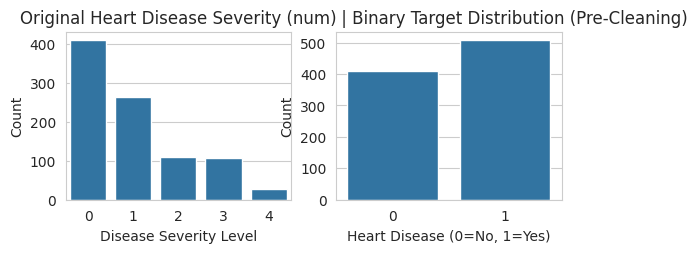

In [ ]:
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='num')
plt.title("Original Heart Disease Severity (num)")
plt.xlabel("Disease Severity Level")
plt.ylabel("Count")

plt.subplot(2, 2, 2)
df['target'] = (df['num'] > 0).astype(int)
sns.countplot(data=df, x='target')
plt.title("                         | Binary Target Distribution (Pre-Cleaning)") #I'm adding the space so that the title is readable. There's probably a better way to fix that.
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Count")


Some Quick statistics on Sample sizes and class distribution

In [ ]:
sample_size = len(df)
print(f"Sample Size: {sample_size}")

# Class Distribution
disease_percentage = (df['target'].sum() / len(df)) * 100
healthy_percentage = 100 - disease_percentage
print(f"Class Distribution:\nDisease % (1): {disease_percentage:.2f}%\nHealthy % (0): {healthy_percentage:.2f}%")

Sample Size: 920
Class Distribution:
Disease % (1): 55.33%
Healthy % (0): 44.67%


##2. Age Analysis


 The below graphs visualize the distribution of age within the dataset as it explores its relationship with heart disease.

<ipython-input-6-529532f441c7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num', y='age', palette='viridis')


Text(0, 0.5, 'Age')

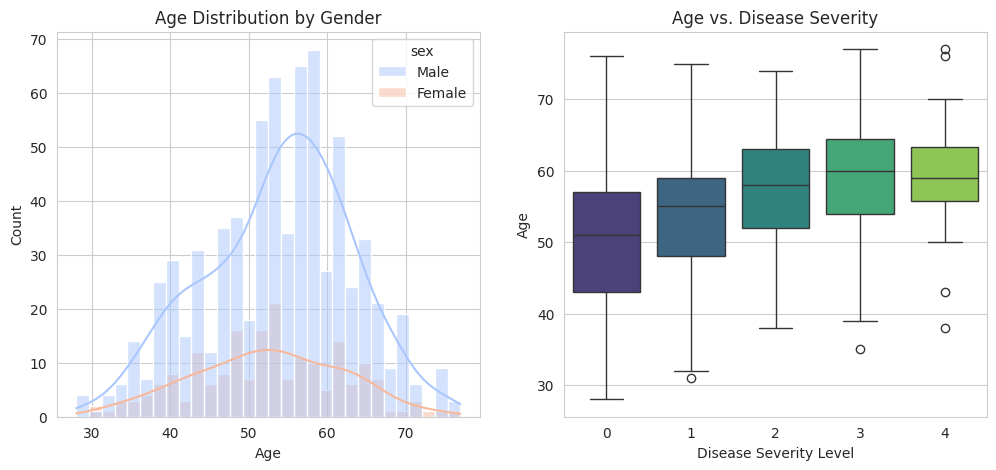

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='age', bins=30, kde=True, hue='sex', palette='coolwarm')
plt.title("Age Distribution by Gender")
plt.xlabel("Age")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='num', y='age', palette='viridis')
plt.title("Age vs. Disease Severity")
plt.xlabel("Disease Severity Level")
plt.ylabel("Age")



##3. Categorical Features

Here, we create a grid of four plots to visualize the relationship between categorical features (lots of medical terms that probably cause heart disease) and heart disease severity

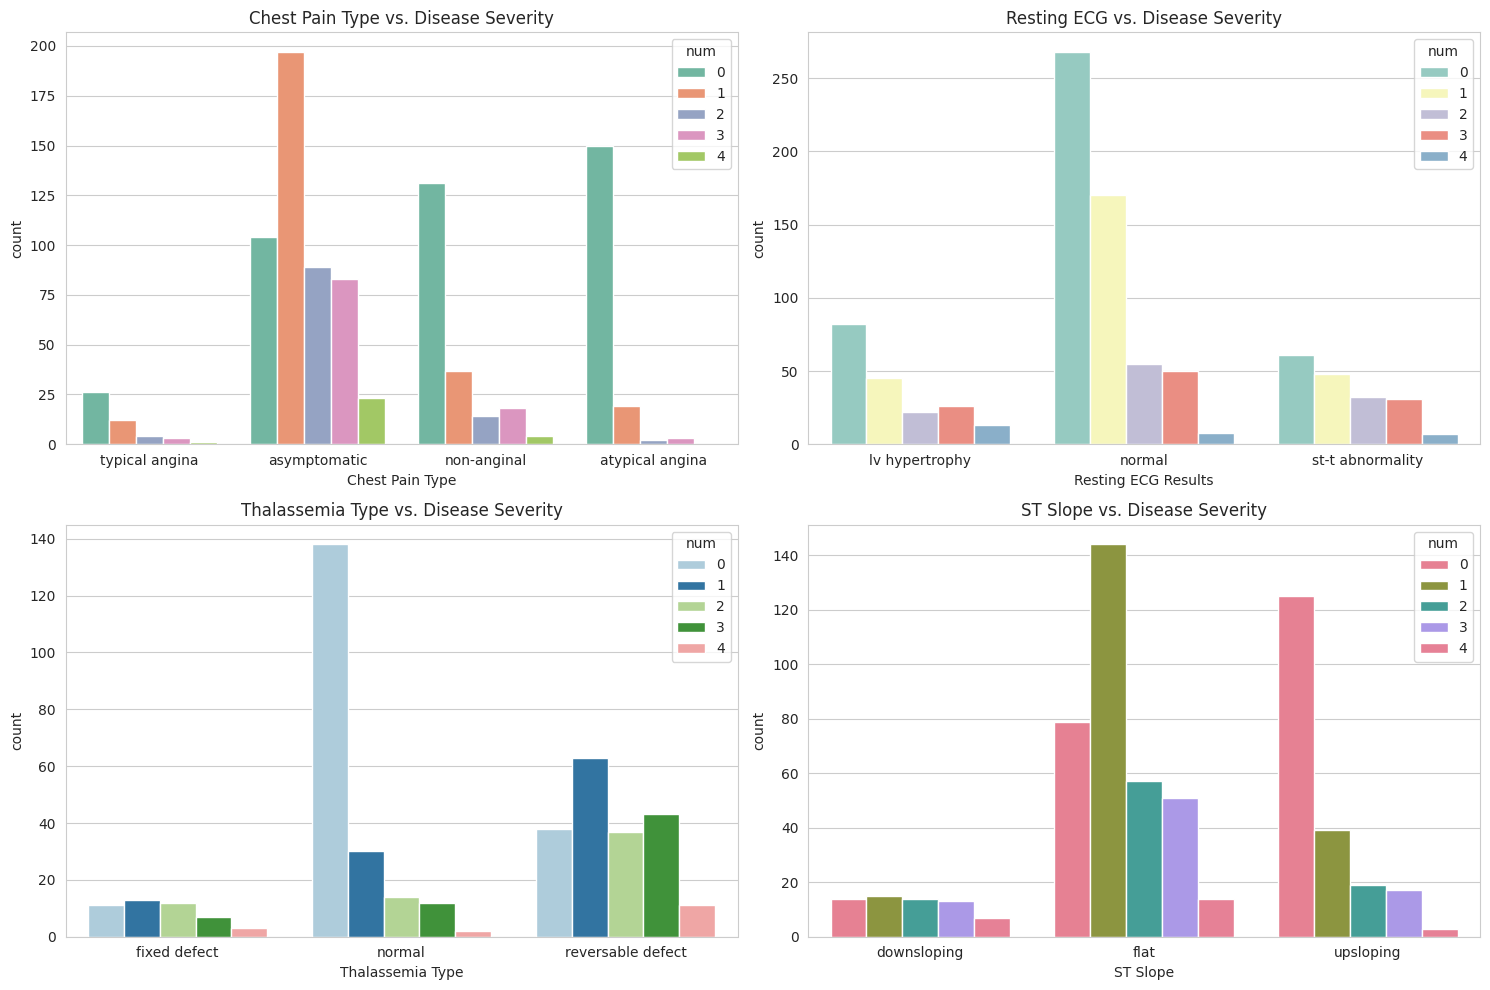

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Chest Pain Type
sns.countplot(data=df, x='cp', hue='num', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title("Chest Pain Type vs. Disease Severity")
axes[0, 0].set_xlabel("Chest Pain Type")

# Resting ECG
sns.countplot(data=df, x='restecg', hue='num', ax=axes[0, 1], palette='Set3')
axes[0, 1].set_title("Resting ECG vs. Disease Severity")
axes[0, 1].set_xlabel("Resting ECG Results")

# Thalassemia
sns.countplot(data=df, x='thal', hue='num', ax=axes[1, 0], palette='Paired')
axes[1, 0].set_title("Thalassemia Type vs. Disease Severity")
axes[1, 0].set_xlabel("Thalassemia Type")

# Slope
sns.countplot(data=df, x='slope', hue='num', ax=axes[1, 1], palette='husl')
axes[1, 1].set_title("ST Slope vs. Disease Severity")
axes[1, 1].set_xlabel("ST Slope")

plt.tight_layout()


## 4. Numerical Feature Relationships

This section visualizes the relationships between different numerical features in the dataset and heart disease.

<ipython-input-8-d29facabd529>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num', y='oldpeak', palette='magma')


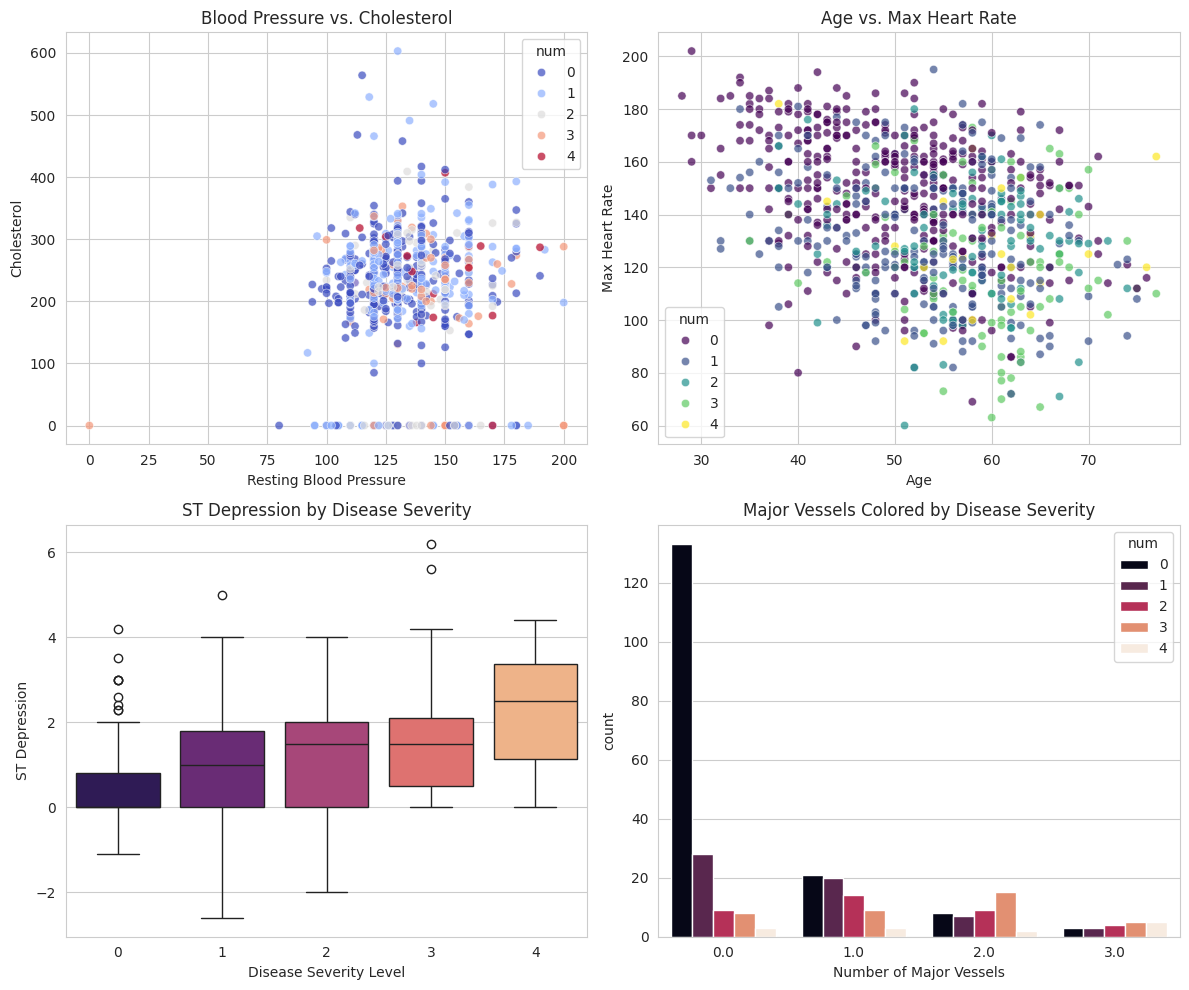

In [ ]:
plt.figure(figsize=(12, 10))

# Blood Pressure vs. Cholesterol
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='trestbps', y='chol', hue='num', palette='coolwarm', alpha=0.7)
plt.title("Blood Pressure vs. Cholesterol")
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Cholesterol")

# Max Heart Rate vs. Age
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='age', y='thalch', hue='num', palette='viridis', alpha=0.7)
plt.title("Age vs. Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")

# Oldpeak (ST Depression) Distribution
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='num', y='oldpeak', palette='magma')
plt.title("ST Depression by Disease Severity")
plt.xlabel("Disease Severity Level")
plt.ylabel("ST Depression")

# Major Vessels
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='ca', hue='num', palette='rocket')
plt.title("Major Vessels Colored by Disease Severity")
plt.xlabel("Number of Major Vessels")

plt.tight_layout()



## 5. Correlation Matrix

Using a heat map, we create a visual representation of the relationships between the numerical features in our dataset.

The math simply calculates how strongly the dataset's numerical features are related to each other, and then visualizes these relationships in a heatmap(rather colorful heatmap if I may say so myself) where we can easily spot strong positive and negative correlations.

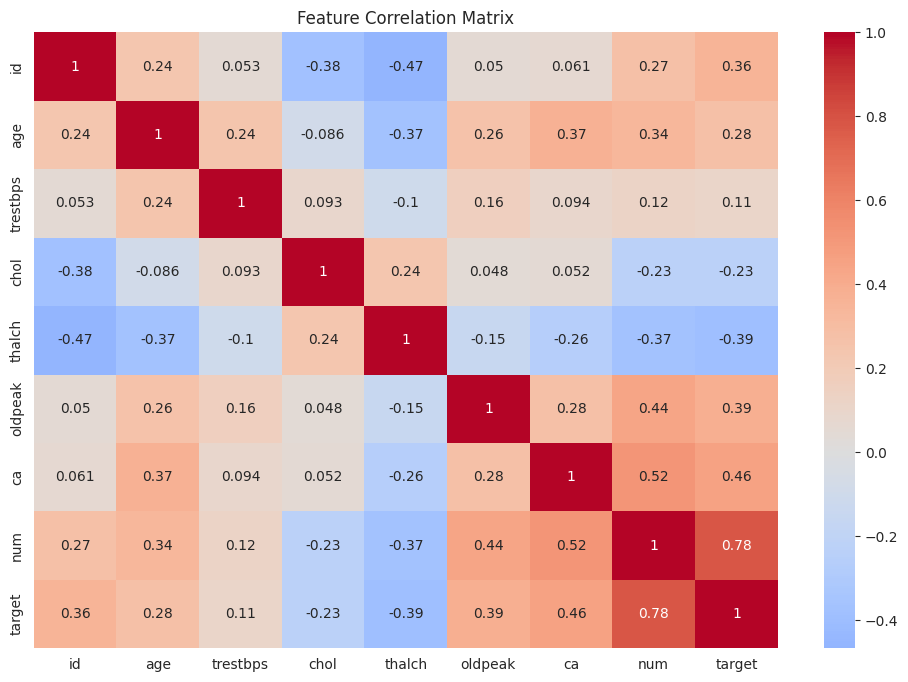

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()

## 6. Interactive Visualizations

The final plot allow us to explore the data in a more dynamic way compared to static plots. Making it easy to explore relationships between patient features (like age, gender, cholesterol, blood pressure) and heart disease. (3D scatter plots being fun to play with had absolutely nothing to do with my choice.😇)

In [ ]:
# Interactive 3D Scatter Plot
fig = px.scatter_3d(df, x='age', y='chol', z='trestbps',
                    color='num', symbol='sex',
                    title="3D Relationship: Age, Cholesterol & Blood Pressure")
fig.show()

# Interactive Age Distribution
fig = px.histogram(df, x='age', color='sex', marginal='box',
                   title="Interactive Age Distribution by Gender")
fig.show()

# 3. Preprocessing

The summary core aims here are to fix column names, handle missing values, and encode categorical features.<br><br>
Specifically, the code below:<br>
1. Fixes inconsistent values
2. We create a new column named 'target'. If the value in the num column is greater than 0, the target is set to 1 - indicating heart disease, otherwise, it's set to 0 - no heart disease. <br>
This creates the binary classification target for our machine learning models.
2. Converts target to binary (0: No disease, 1: Disease)
3. Drops useless columns
4. Handles missing values by making use of simple imputation. Which just means that for numerical features, like age, cholesterol, we fill any missing values with the median value of that feature.<br>
For categorical features like sex, chest pain type, it fills missing values with the most frequent value (mode) of that feature.

In [ ]:
def clean_data(df):
    print("Cleaning data...")

    df['thal'] = df['thal'].replace({'fixed defect': 'fixed_defect', 'reversable defect': 'reversable_defect'})
    df['cp'] = df['cp'].replace({'typical angina': 'typical_angina', 'atypical angina': 'atypical_angina'})
    df['restecg'] = df['restecg'].replace({'normal': 'normal', 'st-t abnormality': 'ST-T_wave_abnormality'})

    df['target'] = (df['num'] > 0).astype(int)

    df = df.drop(columns=['id', 'num', 'dataset'])

    numerical_features = df.select_dtypes(include=np.number).columns
    df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

    categorical_features = df.select_dtypes(include='object').columns
    for col in categorical_features:
        df[col] = df[col].fillna(df[col].mode()[0])

    return df

We'll run the below code only once because it drops columns in our dataset. Running more than once will cause an error since the columns no longer exist.

In [ ]:
df = clean_data(df)
print("✅ Data cleaned!")

Cleaning data...
✅ Data cleaned!


<ipython-input-11-05072026055e>:17: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



# Feature Engineering<br>
Machine learning models generally work best with numerical data. Thus, next we convert these categories into numbers through encoding.

In [ ]:
def encode_features(df):
    categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']
    encoders = {}

    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le

    # Save encoders for later download
    joblib.dump(encoders, 'encoders.joblib')
    return df

df = encode_features(df)
print("🤖 Features encoded! (●'◡'●)")

🤖 Features encoded! (●'◡'●)


Train Test Split <br>
The usual: 20% test 80% train split

In [ ]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (736, 13), Test shape: (184, 13)


#5. Model Training & Evaluation<br>
We'll use a custom function that takes in a model name and the actual model objects as inputs.<br>
This allows us to train multiple models and compare their performance.<br>
Within the function, we'll loop through the models and train, predict, evaluate and give an output for all the models in the dictionary.

In [ ]:
def train_and_evaluate(models):
    results = {}
    for name, model in models.items():
        print(f"🏫Training {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

        results[name] = {'Accuracy': accuracy, 'F1': f1, 'ROC AUC': roc_auc}
        print(f"{name} - Accuracy: {accuracy:.2f}, F1: {f1:.2f}, ROC AUC: {roc_auc:.2f}")

    return pd.DataFrame(results).T

**Defining and Training Models**<br>
Here we create the actual dictionary that holds the list of model objects and their names, then sort the results based on accuracy to easily see which model performs best.

In [ ]:
from sklearn.svm import SVC # import SVC from sklearn.svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'SVM': SVC(random_state=42, probability=True), # Set probability=True for SVC
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
}

results = train_and_evaluate(models)
results.sort_values('Accuracy', ascending=False)

🏫Training Random Forest...
Random Forest - Accuracy: 0.83, F1: 0.85, ROC AUC: 0.91
🏫Training XGBoost...
XGBoost - Accuracy: 0.88, F1: 0.89, ROC AUC: 0.90
🏫Training CatBoost...
CatBoost - Accuracy: 0.84, F1: 0.86, ROC AUC: 0.91
🏫Training SVM...
SVM - Accuracy: 0.71, F1: 0.74, ROC AUC: 0.82
🏫Training Decision Tree...
Decision Tree - Accuracy: 0.78, F1: 0.81, ROC AUC: 0.78
🏫Training Gaussian Naive Bayes...
Gaussian Naive Bayes - Accuracy: 0.78, F1: 0.80, ROC AUC: 0.88
🏫Training K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.69, F1: 0.73, ROC AUC: 0.74
🏫Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.84, F1: 0.86, ROC AUC: 0.91
🏫Training XGBClassifier...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[18:22:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier - Accuracy: 0.88, F1: 0.89, ROC AUC: 0.90


,Accuracy,F1,ROC AUC
XGBoost,0.875000,0.890995,0.903731
XGBClassifier,0.875000,0.890995,0.903731
Gradient Boosting,0.842391,0.859903,0.907401
CatBoost,0.836957,0.857143,0.908012
Random Forest,0.831522,0.850242,0.907278
Gaussian Naive Bayes,0.782609,0.801980,0.875107
Decision Tree,0.782609,0.814815,0.777003
SVM,0.711957,0.738916,0.816269
K-Nearest Neighbors,0.690217,0.729858,0.740917


#6. Save Best Model <br>
The below code takes the best accuracy score and creates a model from that best performer and saves it.

In [ ]:
best_model_name = results['Accuracy'].idxmax()
best_model = models[best_model_name]

# Train and save the best model
best_model.fit(X_train, y_train)
joblib.dump(best_model, f'Model_{best_model_name.lower().replace(" ", "_")}.joblib')
print(f"🤖 Best model ({best_model_name}) saved!")

🤖 Best model (XGBoost) saved!


# SHAP explainer
 SHAP is a visualization tool used to explain how each feature in our dataset impacts the model's predictions. It's based on SHapley Additive exPlanations (SHAP), a game-theoretic approach to interpret model outputs.

Y-axis: List of features (ranked by importance).

X-axis: SHAP value → how much a feature pushes the prediction toward disease (1) or no disease (0).

Color: Feature value (red = high, blue = low)

Model_xgboost.joblib


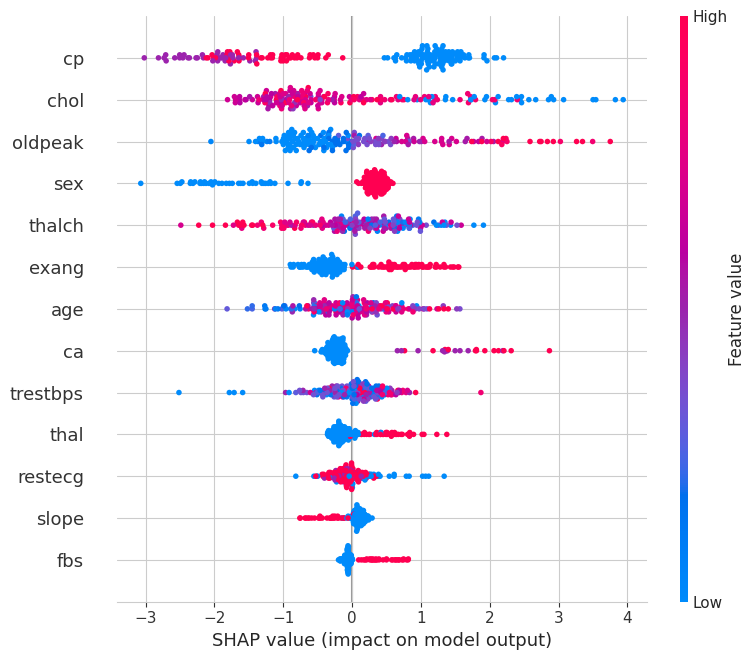

In [ ]:
import shap

model = joblib.load(f'Model_{best_model_name.lower()}.joblib')
print(f'Model_{best_model_name.lower()}.joblib')
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)